# Assignment 7

### Q1.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

Training set size: 120 samples
Test set size: 30 samples
--------------------------------------------------

Training SVM with LINEAR kernel...
Evaluation for LINEAR kernel:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix for LINEAR kernel:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


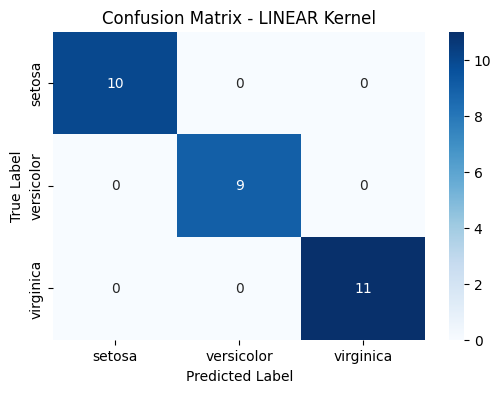


Training SVM with POLY kernel...
Evaluation for POLY kernel:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix for POLY kernel:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


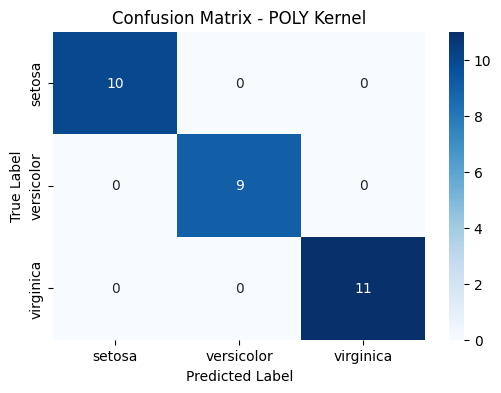


Training SVM with RBF kernel...
Evaluation for RBF kernel:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix for RBF kernel:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


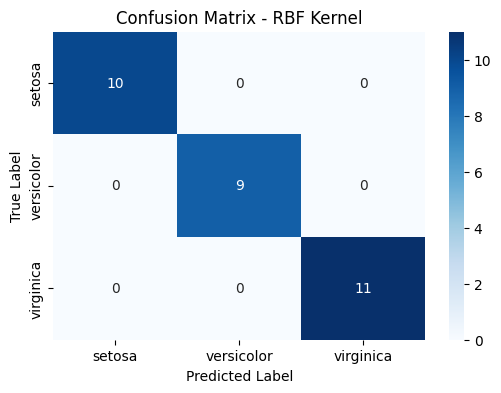

In [8]:
# a)
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# b)
kernels = ['linear', 'poly', 'rbf']
models = {}

for kernel_name in kernels:
    print(f"\nTraining SVM with {kernel_name.upper()} kernel...")

    if kernel_name == 'poly':
        model = SVC(kernel=kernel_name, degree=3, random_state=42)
    else:
        model = SVC(kernel=kernel_name, random_state=42)

    model.fit(X_train, y_train)
    models[kernel_name] = model

    y_pred = model.predict(X_test)

    # c)
    print(f"Evaluation for {kernel_name.upper()} kernel:")

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    report = classification_report(y_test, y_pred, target_names=target_names)
    print("Classification Report:")
    print(report)

    # d)
    print(f"Confusion Matrix for {kernel_name.upper()} kernel:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix - {kernel_name.upper()} Kernel')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

### Q2.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [7]:
# a) Use the Breast Cancer dataset
bc = load_breast_cancer()
X_bc = bc.data
y_bc = bc.target

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

print(f"Breast Cancer dataset features: {X_bc.shape[1]}")

print("\nTraining SVM (RBF Kernel) WITHOUT Feature Scaling...")
model_no_scaling = SVC(kernel='rbf', random_state=42)
model_no_scaling.fit(X_train_bc, y_train_bc)

train_acc_no_scale = model_no_scaling.score(X_train_bc, y_train_bc)
test_acc_no_scale = model_no_scaling.score(X_test_bc, y_test_bc)

print(f"Training Accuracy (No Scaling): {train_acc_no_scale:.4f}")
print(f"Testing Accuracy (No Scaling):  {test_acc_no_scale:.4f}")


# b)
print("\nTraining SVM (RBF Kernel) WITH Feature Scaling (StandardScaler)...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bc)
X_test_scaled = scaler.transform(X_test_bc)

model_with_scaling = SVC(kernel='rbf', random_state=42)
model_with_scaling.fit(X_train_scaled, y_train_bc)

train_acc_with_scale = model_with_scaling.score(X_train_scaled, y_train_bc)
test_acc_with_scale = model_with_scaling.score(X_test_scaled, y_test_bc)

print(f"Training Accuracy (With Scaling): {train_acc_with_scale:.4f}")
print(f"Testing Accuracy (With Scaling):  {test_acc_with_scale:.4f}")

# c)
print(f"Comparing the testing accuracies:")
print(f"  - Without Scaling: {test_acc_no_scale:.4f}")
print(f"  - With Scaling:    {test_acc_with_scale:.4f}")

Breast Cancer dataset features: 30

Training SVM (RBF Kernel) WITHOUT Feature Scaling...
Training Accuracy (No Scaling): 0.9143
Testing Accuracy (No Scaling):  0.9474

Training SVM (RBF Kernel) WITH Feature Scaling (StandardScaler)...
Training Accuracy (With Scaling): 0.9890
Testing Accuracy (With Scaling):  0.9825
Comparing the testing accuracies:
  - Without Scaling: 0.9474
  - With Scaling:    0.9825
